<a href="https://colab.research.google.com/github/JuniorTorresMTJ/FraudBoleto/blob/main/art/BoletoFraud_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
***
#BOLETO FRAUD DETECTION
***
***

#INTRODUCTION

In Brazil, the boleto is one of the most used forms of payment, the vast majority of Brazilians have already paid a boleto in their lives.
About 4 billion slips are settled per year, according to data from the Brazilian Federation of Banks (Febraban).

##WHAT IS BOLETO?

The bank **Boleto** is a simple and agile way to make payments. In the past, boletos could only be paid at bank and lottery agencies, but nowadays, with technological advances, this payment can be made in many physical and digital locations.

4 out of 10 people over 18 are considered **unbanked in Brazil** and having the possibility of issuing a bank slip as a payment method for the sale of a product or service can be a survival factor for many companies.

Many **companies** give **discounts to consumers** who pay through **boleto**. So the boleto benefits both who pays the boleto and who receives the amount.

The **boleto** has fundamental **elements** so that the payer is **not confused** and can easily identify the data necessary to make the correct **payment** of the amount that he has as a debt. First, there is an indication of the bank that will receive the payment, the transferor (who issues the collection) and the drawee (the holder of the collection), who must make the payment, as well as the amount to be paid, the deadline for the payment of the service or product, indications for a possible discharge after the due date and, finally, most of these documents come with a bar code, which allows the automatic capture of all this data through **optical readers** of the accredited **establishments** to receipt of **payment**.

**See an example Boleto below:**

<img src="https://www.rtek.com.br/wp-content/uploads/2017/08/boletobancario.jpg" alt="win" width="800"/>

#IMPORT OF LIBRARIES

In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

#FUNCTIONS

In [ ]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def show_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers

##GRAPHIC COLORS

In [ ]:
color =['#87B738',
        '#283610',
        '#ABCC73'] 

#IMPORT OF THE BASE

In [ ]:
df_boleto = pd.read_csv("https://raw.githubusercontent.com/JuniorTorresMTJ/FraudBoleto/main/Data/dataset_case_boleto.csv", sep=";")
df_boleto

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude
0,01/03/2020,5e74d202d1498c5bdf8aafe3,cnpj,6000,"4884,61",63500,"2122,83",10,13,0,35,11,0,0
1,01/03/2020,5e78dafeb5ac867c7e85eb5e,cnpj,1800,1800,3600,0,0,2,0,0,11,0,0
2,01/03/2020,5e73e21359193c2f123c1076,cnpj,"159,9","104,9","209,8","77,78",0,2,0,14,11,0,0
3,01/04/2020,5e7262c49d55ea5dbea59d57,cnpj,600,600,1800,0,0,3,0,18,11,0,0
4,01/04/2020,5e610d9f66945c0f82dd357f,cnpj,2941,"1764,6",8823,"657,63",2,5,0,65,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,01/11/2020,5fa6013aec647c00160a173b,cpf,50,50,50,0,0,1,0,0,2,0,1
9273,01/11/2020,5fc3ed1659018400162a83ad,cpf,10,10,10,0,1,1,0,0,3,0,0
9274,01/10/2020,5f6f796ccff5532d540c6f58,cpf,160,160,160,0,0,1,0,0,5,0,0
9275,01/12/2020,5ebd605d4c4cb062ab6b3c66,cnpj,600,600,600,0,0,1,0,0,9,0,0


##CONVERTING DATA TYPES

**EUA vs BR**


Comma or Dot?


As a general rule, the vast majority of texts written in the USA use the dot as the decimal separator, while the vast majority of texts written in Brazil use the comma as the decimal separator.

As the US uses English as its primary language, so English texts use the period. As Brazil uses Portuguese, so texts in Portuguese use the comma.

That is, the use of the recommended decimal separator is more related firstly to the country, secondly (consequently) to the language and, lastly (and consequently again) to the currency.

In this notebook dot will be used as decimal separator. So let's do the transformation of this data to suit what was chosen as the default.

In [ ]:
df_boleto['max_valor_boleto'] = df_boleto['max_valor_boleto'].str.replace(',', '.')
df_boleto['avg_valor_boleto'] = df_boleto['max_valor_boleto'].str.replace(',', '.')
df_boleto['total_valor_boleto'] = df_boleto['max_valor_boleto'].str.replace(',', '.')
df_boleto['valor_boleto_stdv'] = df_boleto['max_valor_boleto'].str.replace(',', '.')

In [ ]:
df_boleto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9277 entries, 0 to 9276
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   mes_ref               9277 non-null   object
 1   company_id            9277 non-null   object
 2   tipo_doc              9277 non-null   object
 3   max_valor_boleto      9277 non-null   object
 4   avg_valor_boleto      9277 non-null   object
 5   total_valor_boleto    9277 non-null   object
 6   valor_boleto_stdv     9277 non-null   object
 7   qtd_boleto_pago       9277 non-null   int64 
 8   qtd_boleto_total      9277 non-null   int64 
 9   qtd_boleto_estorno    9277 non-null   int64 
 10  qnt_cc_total          9277 non-null   int64 
 11  tempo_credenciamento  9277 non-null   int64 
 12  conta_bnk_repetida    9277 non-null   int64 
 13  fraude                9277 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 1014.8+ KB


See that the columns 'max_boleto_value', 'avg_boleto_value', 'total_boleto_value' and 'boleto_value_stdv' are as **Object** and not as **Float**. 

In `.describe()` besides being able to check the **data type** of each **column**, we can take advantage and check if there is **any null data** in our **columns** and as we can see, there is **no null data**, so we won't need **to clean or transform** the null data in the future, given that there is no null data.

So, now, let's transform the data into Float using `.astype` in the columns that we change the decimal separator.

In [ ]:
df_boleto['mes_ref']= pd.to_datetime(df_boleto['mes_ref'])
df_boleto['max_valor_boleto'] = df_boleto['max_valor_boleto'].astype(float)
df_boleto['avg_valor_boleto'] = df_boleto['avg_valor_boleto'].astype(float)
df_boleto['total_valor_boleto'] = df_boleto['total_valor_boleto'].astype(float)
df_boleto['valor_boleto_stdv'] = df_boleto['valor_boleto_stdv'].astype(float)

#EXPLORATORY DATA ANALYSIS

Now that we have made the minimal transformations in our dataset, we can start the exploratory analysis of our data in order to be able to map and identify fraudster patterns or take some other insight.

First we need to check if the company_id is repeated in this dataset, to know this information we will use valeu_counts(), if more than 1 appears we can say that the companies are repeated in our dataset and we need to analyze to know if we will only need to leave a line for each company Or will we leave it as is?

In [ ]:
df_boleto['company_id'].value_counts()

5e1c738d7268a016d9e71108    14
5e7deeb02f762855a6cda76f    13
5e8248b696d2ac227249d8ac    13
5e7cbc38f2eebc591d523154    13
5e73911df84ce3362c22ae23    13
                            ..
5e8bdf6e97aeba54644ed5be     1
5fbc451a9ab2b9001641ca01     1
601eb0e5a1bff400115c4ff3     1
60255ac95f9809001231690f     1
5fc3ed1659018400162a83ad     1
Name: company_id, Length: 4960, dtype: int64

See that you have companies that are repeating themselves many times in the same dataset

Let's look at the company that is most repeated in this dataset: a **company_id = 5e1c738d7268a016d9e71108**

In [ ]:
df_boleto.query('company_id =="5e1c738d7268a016d9e71108"')

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude
106,2020-01-08,5e1c738d7268a016d9e71108,cnpj,353.0,353.0,353.0,353.0,16,19,0,6,14,0,0
201,2020-01-10,5e1c738d7268a016d9e71108,cnpj,580.0,580.0,580.0,580.0,20,26,0,10,14,0,0
655,2020-01-09,5e1c738d7268a016d9e71108,cnpj,353.0,353.0,353.0,353.0,14,20,0,8,14,0,0
803,2020-01-01,5e1c738d7268a016d9e71108,cnpj,119.0,119.0,119.0,119.0,2,2,0,3,14,0,0
1495,2020-01-12,5e1c738d7268a016d9e71108,cnpj,327.0,327.0,327.0,327.0,30,37,0,5,14,0,0
1669,2020-01-04,5e1c738d7268a016d9e71108,cnpj,218.0,218.0,218.0,218.0,17,21,0,9,14,0,0
2844,2020-01-03,5e1c738d7268a016d9e71108,cnpj,272.0,272.0,272.0,272.0,8,11,0,4,14,0,0
3421,2021-01-03,5e1c738d7268a016d9e71108,cnpj,754.0,754.0,754.0,754.0,0,2,0,0,14,0,0
3443,2020-01-07,5e1c738d7268a016d9e71108,cnpj,353.0,353.0,353.0,353.0,19,24,0,6,14,0,0
4230,2020-01-06,5e1c738d7268a016d9e71108,cnpj,353.0,353.0,353.0,353.0,16,20,0,8,14,0,0


As we can see in this clipping of the company's dataframe that is most repeated, each line is a slip paid by the company, we can see this because of the **mes_ref** column. See that each row is a different month, so it's historical data for that company.

In the case of this company, we see that in the **Fraud** column, all the slips paid by it, are **not fraud**.

##BALANCED DATA?

**Unbalanced data** is the small incidence of a category within a dataset (minority class) compared to the majority class.
In the case of this dataset, do we have more cases of fraud or more cases of non-fraud?

Knowing this information is essential for us to continue analyzing the information and this will directly affect the creation of the predictive model that we will create in the future.

Unbalanced data is very common in some branches of knowledge, as it is more normal for one thing to happen than another, such as: cancer diagnosis, fraudulent transaction and spam box for example.

Generally, cancer testers test negative, so we have more information from people who tested negative than positive. Also, in spam box, most emails are genuine.

For now we will only check if the Fraud feature is unbalanced or not and in the future we will use techniques to unbalance this feature, as it can greatly harm the model training.

In [ ]:
balanced = [df_boleto['fraude'].value_counts()[0], df_boleto['fraude'].value_counts()[1]]

fig = go.Figure(go.Bar (x = ['No Fraud', 'Fraud'],
                        y = balanced,
                        marker = dict(color = [color[0], color[1]],
)))
fig.update_layout(
    title="""Balanceamento da Variável Target
            """,
    title_font_size=22,
    font_size=13,
    plot_bgcolor='white',
    legend_x=0.99, legend_xanchor='right', legend_font_size=18,
    hovermode='x',
    bargap=0.15,
    width=800, height=500
)
fig.update_yaxes(title = 'Quantidade')
fig.show()

##NUMERICAL VARIABLES

In [ ]:
numerical_features = df_boleto.drop(['fraude','conta_bnk_repetida'], axis=1).select_dtypes(include = np.number).columns
numerical_features 

Index(['max_valor_boleto', 'avg_valor_boleto', 'total_valor_boleto',
       'valor_boleto_stdv', 'qtd_boleto_pago', 'qtd_boleto_total',
       'qtd_boleto_estorno', 'qnt_cc_total', 'tempo_credenciamento'],
      dtype='object')

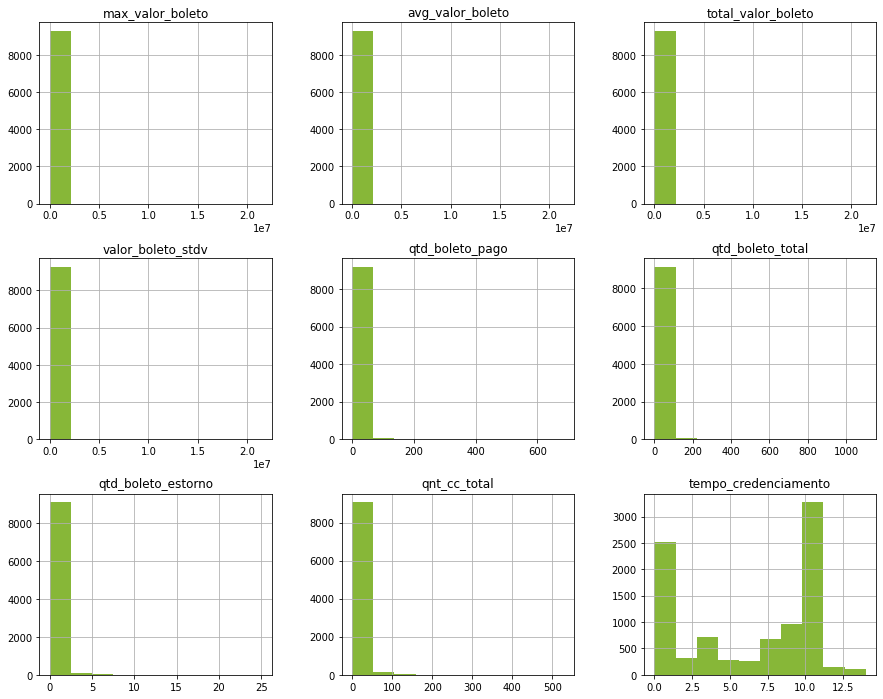

In [ ]:
df_boleto[numerical_features].hist( color=color[0], figsize=[15,12] )
plt.show()

##SPLITIING DATASET

In [ ]:
df_boleto_fraud = df_boleto.query("fraude == 1")
df_boleto_no_fraud = df_boleto.query("fraude == 0")

##EDA CHARTS

###Fraud and non-fraud by Document Type

In [ ]:
b =[df_boleto_no_fraud['tipo_doc'].value_counts(normalize=True)['cpf'], df_boleto_no_fraud['tipo_doc'].value_counts(normalize=True)['cnpj']]
a = [df_boleto_fraud['tipo_doc'].value_counts(normalize=True)['cpf'], df_boleto_fraud['tipo_doc'].value_counts(normalize=True)['cnpj']]


fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=("""<b>Não Fraude""", """<b>Fraude"""))

fig.add_trace(go.Bar (x =['CPF', 'CNPJ'],
                        y = a,
                        marker = dict(color = [color[0], color[1]],
)),1, 1)

fig.add_trace(go.Bar (x = ['CPF', 'CNPJ'],
                        y = b,
                        marker = dict(color = [color[0], color[1]]
)),1, 2)

fig.update_layout(
    title="""Fraud and non-fraud by <b>Document Type</b><br><i>From January 2020 to January 2021</i> """,
    title_xanchor="auto",
    title_font_size=18,
    font_size=13,
    plot_bgcolor='white',
    legend_x=0.99, legend_xanchor='right', legend_font_size=18,
    hovermode='x',
    bargap=0.15,
    yaxis_tickformat = '.0%',
    showlegend=False
)

fig.update_xaxes(
    mirror=True, ticks='outside', showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(
    mirror=True, ticks='outside', showline=True, linewidth=1, linecolor='grey',
    )
fig.update_xaxes(type = 'category', title = 'Documento')
fig.update_yaxes(title = 'Quantidade')

fig.show()

###Fraudulent Credit Card Transactions

In [ ]:
denominador_no_fraud = df_boleto_no_fraud.value_counts().sum()
cc_maior_1 = df_boleto_no_fraud.query('qnt_cc_total >= 1')['qnt_cc_total'].value_counts().sum()/denominador_no_fraud
cc_maior_0 = df_boleto_no_fraud.query('qnt_cc_total == 0')['qnt_cc_total'].value_counts().sum()/denominador_no_fraud
a = [cc_maior_1, cc_maior_0]

denominador_fraud = df_boleto_fraud.value_counts().sum()
cc_maior_0_fraud = df_boleto_fraud.query('qnt_cc_total == 0')['qnt_cc_total'].value_counts().sum()/denominador_fraud
cc_maior_1_fraud = df_boleto_fraud.query('qnt_cc_total >= 1')['qnt_cc_total'].value_counts().sum()/denominador_fraud
b = [cc_maior_1_fraud, cc_maior_0_fraud]


fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=("""<b>Não Fraude""", """<b>Fraude"""))

fig.add_trace(go.Bar (x = ['Maior que 1', 'Nenhum'],
                        y = a,
                        marker = dict(color = [color[0], color[1]],
)),1, 1)

fig.add_trace(go.Bar (x = ['Maior que 1', 'Nenhum'],
                        y = b,
                        marker = dict(color = [color[0], color[1]],
)),1, 2)

fig.update_layout(
    title="""Fraudulent <b>Credit Card</b> Transactions<br><i>From January 2020 to January 2021</i> """,
    title_xanchor="auto",
    title_font_size=18,
    font_size=13,
    plot_bgcolor='white',
    legend_x=0.99, legend_xanchor='right', legend_font_size=18,
    hovermode='x',
    bargap=0.15,
    yaxis_tickformat = '.0%',
    showlegend=False
)

fig.update_xaxes(
    mirror=True, ticks='outside', showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(
    mirror=True, ticks='outside', showline=True, linewidth=1, linecolor='grey',
    )
fig.update_xaxes(type = 'category', title = 'Transações')
fig.update_yaxes(title = 'Quantidade')

fig.show()


###Extorted Boletos

In [ ]:
qtd_estorno_maior_1 = df_boleto_no_fraud.query('qtd_boleto_estorno >= 1')['qtd_boleto_estorno'].value_counts().sum()/denominador_no_fraud
qtd_estorno_maior_0 = df_boleto_no_fraud.query('qtd_boleto_estorno == 0')['qtd_boleto_estorno'].value_counts().sum()/denominador_no_fraud
a = [qtd_estorno_maior_1 , qtd_estorno_maior_0]

qtd_estorno_maior_1_fraud = df_boleto_fraud.query('qtd_boleto_estorno >= 1')['qtd_boleto_estorno'].value_counts().sum()/denominador_fraud
qtd_estorno_maior_0_fraud = df_boleto_fraud.query('qtd_boleto_estorno == 0')['qtd_boleto_estorno'].value_counts().sum()/denominador_fraud
b = [qtd_estorno_maior_1_fraud , qtd_estorno_maior_0_fraud]


fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=("""<b>Não Fraude""", """<b>Fraude"""))

fig.add_trace(go.Bar (x = ['Maior que 1', 'Nenhum'],
                        y = a,
                        marker = dict(color = [color[0], color[1]],
)),1, 1)

fig.add_trace(go.Bar (x = ['Maior que 1', 'Nenhum'],
                        y = b,
                        marker = dict(color = [color[0], color[1]],
)),1, 2)

fig.update_layout(
    title="""Percentage of Boletos <b>Extorted</b><br><i>From January 2020 to January 2021</i> """,
    title_xanchor="auto",
    title_font_size=18,
    font_size=13,
    plot_bgcolor='white',
    legend_x=0.99, legend_xanchor='right', legend_font_size=18,
    hovermode='x',
    bargap=0.15,
    yaxis_tickformat = '.0%',
    showlegend=False
)

fig.update_xaxes(
    mirror=True, ticks='outside', showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(
    mirror=True, ticks='outside', showline=True, linewidth=1, linecolor='grey',
    )
fig.update_xaxes(type = 'category', title = 'Estornos')
fig.update_yaxes(title = 'Quantidade')

fig.show()

###Number of Paid Boletos

In [ ]:
a = df_boleto['qtd_boleto_pago']
#.hist(color=color[0], figsize=(10,10))
b = df_boleto_fraud['qtd_boleto_pago']

fig =  go.Figure()
fig.add_trace(go.Histogram(x = a
                           , marker_color=color[0]
                           , name='No Fraud'
                          ))
fig.add_trace(go.Histogram(x = b
                          , marker_color=color[1]
                          , name='Fraud'
                          ))

fig.update_layout(barmode='overlay',
                  title="""Number of <b>Paid</b> Boletos<br><i>From January 2020 to January 2021</i> """,
                  title_font_size=22,
                  font_size=13,
                  plot_bgcolor='white',
                  legend_x=0.99, legend_xanchor='right', legend_font_size=18,)
fig.update_traces(opacity=0.75)
fig.update_xaxes( title = 'Month',range = [0,50])

fig.show()

###Accreditation Time


In [ ]:
a = df_boleto['tempo_credenciamento']
#.hist(color=color[0], figsize=(10,10))
b = df_boleto_fraud['tempo_credenciamento']

fig =  go.Figure()
fig.add_trace(go.Histogram(x = a
                           , marker_color=color[0]
                           , name='No Fraud'
                          ))
fig.add_trace(go.Histogram(x = b
                          , marker_color=color[1]
                          , name='Fraud'
                          ))

fig.update_layout(barmode='overlay',
                  title="""<b>Accreditation</b> Time<br><i>From January 2020 to January 2021</i>""",
                  title_font_size=22,
                  font_size=13,
                  plot_bgcolor='white',
                  legend_x=0.99, legend_xanchor='right', legend_font_size=18,)
fig.update_traces(opacity=0.75)
fig.update_xaxes( title = 'Month')
fig.show()

##CORRELATION OF FEATURES

In [ ]:
corr = df_boleto.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
corr = corr.mask(mask)


heat = go.Heatmap(
    z = corr,
    x = corr.columns.values,
    y = corr.columns.values,
    zmin = - 0.25, # Sets the lower bound of the color domain
    zmax = 1,
    xgap = 1, # Sets the horizontal gap (in pixels) between bricks
    ygap = 1,
    colorscale ='greens'
)
layout = go.Layout(
    title="""Correalation of <b>Features</b>""",
    title_xanchor="auto",
    title_font_size=18,
    font_size=13,
    plot_bgcolor='white',
    legend_x=0.99, legend_xanchor='right', legend_font_size=18,
    hovermode='x',
    bargap=0.15,
    showlegend=True,
    width=900, 
    height=900,
    yaxis_showgrid=False, 
    yaxis_autorange='reversed',
    xaxis_showgrid=False,
    xaxis={'side': 'bottom'}
)

fig=go.Figure(data=[heat], layout=layout)
fig.show()

##OUTLIER ANALYSIS

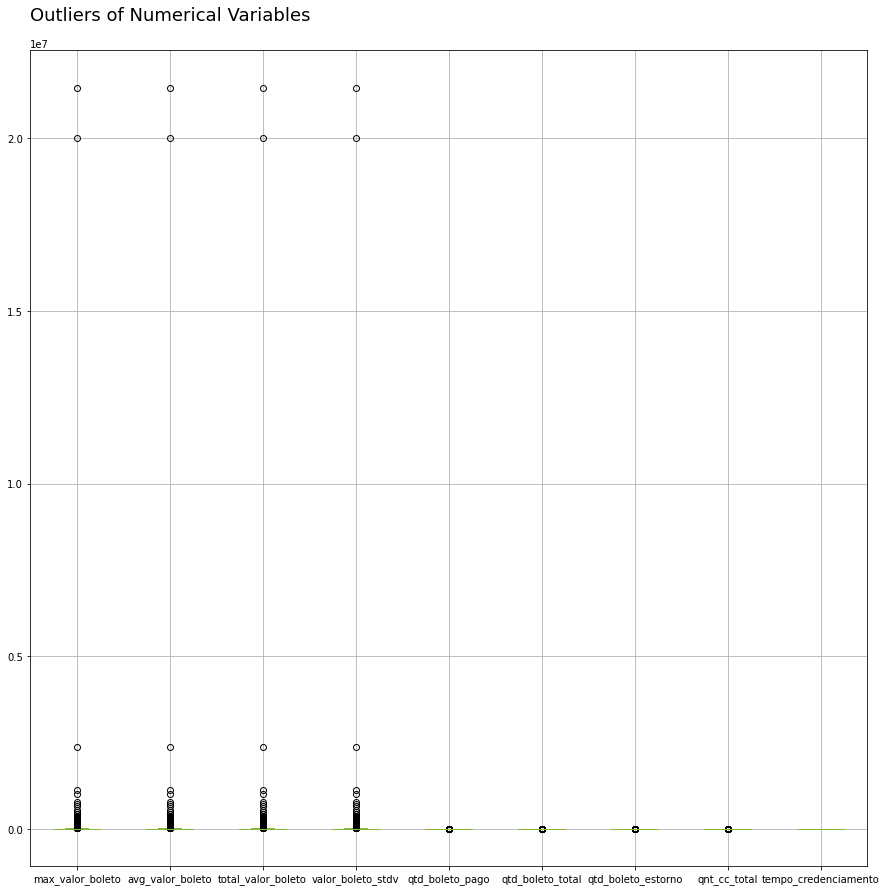

In [ ]:
ax1 = df_boleto[numerical_features].boxplot(color=color[0], figsize=[15,15])

ax1.set_title('''Outliers of Numerical Variables''', fontdict = {'fontsize':18}, loc='left', pad=30)

plt.show()

In [ ]:
df_boleto[numerical_features].max_valor_boleto.sort_values( ascending=False)

8785    21474836.47
5357    20000000.00
8911     2362716.64
2525     1123461.46
8416     1000000.00
           ...     
8635           1.00
1604           1.00
3408           1.00
6775           1.00
7881           1.00
Name: max_valor_boleto, Length: 9277, dtype: float64

In [ ]:
df_boleto_drop = df_boleto.query("max_valor_boleto >= 20000000.00")
df_boleto_drop

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude
5357,2021-01-01,5f2806ac630047377469fc39,cpf,20000000.00,20000000.00,20000000.00,20000000.00,0,3,0,0,5,0,1
8785,2020-01-06,5ed79c02aac2f87ee2f8f0d4,cpf,21474836.47,21474836.47,21474836.47,21474836.47,0,2,0,0,8,0,0


In [ ]:
df_boleto[numerical_features] = df_boleto[numerical_features].drop(axis=0, index=[5357,8785], inplace=False)
# df_boleto[numerical_features].query("max_valor_boleto >= 20000000.00")

In [ ]:
df_boleto[numerical_features].max_valor_boleto.sort_values( ascending=False)
df_boleto = df_boleto.dropna(axis=0)

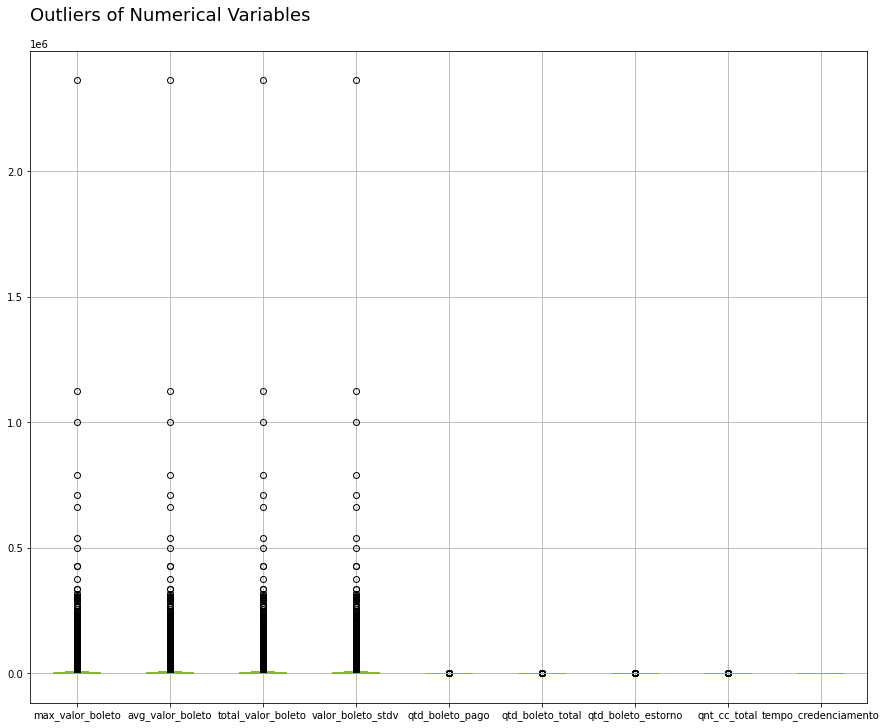

In [ ]:
ax1 = df_boleto[numerical_features].boxplot(color=color[0], figsize=[15,12])
ax1.set_title('''Outliers of Numerical Variables''', fontdict = {'fontsize':18}, loc='left', pad=30)

plt.show()

In [ ]:
q = df_boleto['max_valor_boleto'].quantile(0.99)
df_boleto[df_boleto['max_valor_boleto'] < q]

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude
0,2020-01-03,5e74d202d1498c5bdf8aafe3,cnpj,6000.0,6000.0,6000.0,6000.0,10.0,13.0,0.0,35.0,11.0,0,0
1,2020-01-03,5e78dafeb5ac867c7e85eb5e,cnpj,1800.0,1800.0,1800.0,1800.0,0.0,2.0,0.0,0.0,11.0,0,0
2,2020-01-03,5e73e21359193c2f123c1076,cnpj,159.9,159.9,159.9,159.9,0.0,2.0,0.0,14.0,11.0,0,0
3,2020-01-04,5e7262c49d55ea5dbea59d57,cnpj,600.0,600.0,600.0,600.0,0.0,3.0,0.0,18.0,11.0,0,0
4,2020-01-04,5e610d9f66945c0f82dd357f,cnpj,2941.0,2941.0,2941.0,2941.0,2.0,5.0,0.0,65.0,12.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,2020-01-11,5fa6013aec647c00160a173b,cpf,50.0,50.0,50.0,50.0,0.0,1.0,0.0,0.0,2.0,0,1
9273,2020-01-11,5fc3ed1659018400162a83ad,cpf,10.0,10.0,10.0,10.0,1.0,1.0,0.0,0.0,3.0,0,0
9274,2020-01-10,5f6f796ccff5532d540c6f58,cpf,160.0,160.0,160.0,160.0,0.0,1.0,0.0,0.0,5.0,0,0
9275,2020-01-12,5ebd605d4c4cb062ab6b3c66,cnpj,600.0,600.0,600.0,600.0,0.0,1.0,0.0,0.0,9.0,0,0


In [ ]:
 df_outliers = show_outliers(df_boleto, 'max_valor_boleto')
 df_outliers

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude
41,2020-01-07,5f21cc2e7c1bc041971aa1dc,cpf,12810.00,12810.00,12810.00,12810.00,3.0,30.0,0.0,0.0,5.0,1,0
43,2020-01-08,5eda75206c50252e50d510ff,cpf,18133.80,18133.80,18133.80,18133.80,12.0,75.0,0.0,0.0,6.0,0,0
46,2020-01-08,5f1508f3c61b83616adcb948,cpf,50106.22,50106.22,50106.22,50106.22,1.0,17.0,1.0,0.0,6.0,1,1
97,2020-01-07,5f03b16e1967700dfbd0e216,cpf,78002.86,78002.86,78002.86,78002.86,3.0,52.0,0.0,0.0,6.0,1,0
107,2020-01-08,5f3d1b4ffed7c0764a17379c,cpf,16100.00,16100.00,16100.00,16100.00,2.0,32.0,0.0,0.0,4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253,2021-01-01,6010385ba16427001667b588,cpf,52257.91,52257.91,52257.91,52257.91,0.0,2.0,0.0,0.0,0.0,0,1
9255,2021-01-02,6034d8ef0b333800181386a7,cpf,25093.81,25093.81,25093.81,25093.81,0.0,1.0,0.0,0.0,0.0,0,0
9257,2021-01-01,6011ee0c6d8256001126d156,cpf,138054.00,138054.00,138054.00,138054.00,0.0,1.0,0.0,0.0,0.0,0,1
9258,2021-01-02,602326af333c7d0018ca706d,cpf,48869.99,48869.99,48869.99,48869.99,0.0,1.0,0.0,0.0,0.0,0,1


In [ ]:
 df_outliers['fraude'].value_counts(normalize=True)

1    0.603242
0    0.396758
Name: fraude, dtype: float64

In [ ]:
df_outliers_fraud = df_outliers[df_outliers['fraude'] ==1].sort_values(by='max_valor_boleto', ascending=False)
df_outliers_fraud 

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude
1263,2020-01-10,5f763cfece082141cccf395f,cpf,788900.00,788900.00,788900.00,788900.00,0.0,18.0,1.0,0.0,4.0,1,1
3906,2020-01-09,5f501c349c207a1e1733499c,cpf,709828.80,709828.80,709828.80,709828.80,0.0,6.0,0.0,0.0,4.0,0,1
4085,2020-01-11,5f7f9f408f250243855fbde2,cpf,662938.80,662938.80,662938.80,662938.80,0.0,15.0,1.0,0.0,3.0,0,1
7347,2020-01-08,5f2b17517d4d261666d4d6e3,cpf,500000.00,500000.00,500000.00,500000.00,0.0,1.0,0.0,0.0,6.0,0,1
3384,2020-01-11,5fc0076999c22000160ef3b3,cpf,428250.58,428250.58,428250.58,428250.58,1.0,4.0,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,2021-01-01,5ffbab25123ecd00176feaa6,cpf,11223.00,11223.00,11223.00,11223.00,0.0,1.0,0.0,0.0,0.0,0,1
6374,2020-01-12,5fe77c3a4f591d001109c6f3,cpf,11223.00,11223.00,11223.00,11223.00,0.0,1.0,0.0,0.0,0.0,0,1
5892,2021-01-02,6017519f8d518f00170e2f3b,cpf,11135.58,11135.58,11135.58,11135.58,0.0,10.0,0.0,0.0,0.0,0,1
4295,2021-01-01,600ae7ff965c730010ffc049,cpf,10953.07,10953.07,10953.07,10953.07,0.0,2.0,1.0,0.0,0.0,1,1


In [ ]:
df_outliers_no_fraud = df_outliers[df_outliers['fraude'] ==0].sort_values(by='max_valor_boleto', ascending=False)
df_outliers_no_fraud

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude
8911,2021-01-03,603a7c635c4084001172a045,cpf,2362716.64,2362716.64,2362716.64,2362716.64,0.0,1.0,0.0,0.0,0.0,0,0
2525,2020-01-07,5f18a9f7f9a6145d119e2f2d,cpf,1123461.46,1123461.46,1123461.46,1123461.46,2.0,31.0,0.0,0.0,5.0,0,0
8416,2020-01-05,5eb0641f82d6e558bd567300,cnpj,1000000.00,1000000.00,1000000.00,1000000.00,2.0,5.0,0.0,11.0,10.0,0,0
2908,2020-01-07,5eda728ca435c804e5f7f30d,cpf,540152.34,540152.34,540152.34,540152.34,0.0,8.0,0.0,0.0,6.0,1,0
8917,2020-01-11,5f498660e3e4f917d3e74cd7,cnpj,376763.29,376763.29,376763.29,376763.29,2.0,47.0,2.0,0.0,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,2020-01-11,5e970c0efb075e6110f66fd9,cnpj,11100.00,11100.00,11100.00,11100.00,0.0,2.0,0.0,20.0,10.0,0,0
2126,2020-01-12,5fac07c2c7bcfb0016f25813,cpf,11025.29,11025.29,11025.29,11025.29,0.0,14.0,0.0,0.0,1.0,1,0
3840,2020-01-08,5f329917e4d22a3a8e2d1e33,cpf,11007.36,11007.36,11007.36,11007.36,3.0,26.0,0.0,0.0,4.0,0,0
4386,2020-01-09,5e8b7f15804a590f0545961e,cnpj,11000.00,11000.00,11000.00,11000.00,5.0,5.0,0.0,0.0,11.0,0,0
